In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

In [3]:
files = glob.glob("*.csv")

data_dict = {}
for file in files:
    df = pd.read_csv(file)
    data_dict[file] = df
    print(f"{file}: {len(df)} записей")

fantasy_many_dragons_ab3.csv: 2001 записей
fantasy_many_dragons_rk4.csv: 2001 записей
fantasy_many_sheep_ab3.csv: 2001 записей
fantasy_many_sheep_rk4.csv: 2001 записей
fantasy_near_equilibrium_ab3.csv: 2001 записей
fantasy_near_equilibrium_rk4.csv: 2001 записей
fantasy_near_eq_ab3.csv: 2001 записей
fantasy_near_eq_rk4.csv: 2001 записей
real_many_foxes_ab3.csv: 2001 записей
real_many_foxes_rk4.csv: 2001 записей
real_many_rabbits_ab3.csv: 2001 записей
real_many_rabbits_rk4.csv: 2001 записей
real_near_eq_ab3.csv: 2001 записей
real_near_eq_rk4.csv: 2001 записей


In [4]:
def plot_scenario_comparison(scenario_type):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    # Скроем последний (шестой) subplot, так как используем только 5
    axes[1, 2].axis('off')
    
    # Находим файлы для данного сценария
    rk4_files = [f for f in files if scenario_type in f and 'rk4' in f]
    ab3_files = [f for f in files if scenario_type in f and 'ab3' in f]
    
    # Загружаем данные
    df_rk4 = data_dict[rk4_files[0]]
    df_ab3 = data_dict[ab3_files[0]]
    
    # 1. Динамика жертв (сравнение методов) - верхний левый
    axes[0, 0].plot(df_rk4['time'], df_rk4.iloc[:, 1], 'b-', linewidth=2, label='РК4', alpha=0.8)
    axes[0, 0].plot(df_ab3['time'], df_ab3.iloc[:, 1], 'b--', linewidth=2, label='АБ3', alpha=0.8)
    axes[0, 0].set_xlabel('Время')
    axes[0, 0].set_ylabel('Численность')
    axes[0, 0].set_title(f'Динамика жертв\n{scenario_type}')
    axes[0, 0].legend(loc='best', fontsize=9)
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Динамика хищников (сравнение методов) - верхний средний
    axes[0, 1].plot(df_rk4['time'], df_rk4.iloc[:, 2], 'r-', linewidth=2, label='РК4', alpha=0.8)
    axes[0, 1].plot(df_ab3['time'], df_ab3.iloc[:, 2], 'r--', linewidth=2, label='АБ3', alpha=0.8)
    axes[0, 1].set_xlabel('Время')
    axes[0, 1].set_ylabel('Численность')
    axes[0, 1].set_title(f'Динамика хищников\n{scenario_type}')
    axes[0, 1].legend(loc='best', fontsize=9)
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Фазовый портрет РК4 - верхний правый
    axes[0, 2].plot(df_rk4.iloc[:, 1], df_rk4.iloc[:, 2], 'g-', linewidth=1.5, alpha=0.7, label='РК4')
    axes[0, 2].set_xlabel('Жертвы')
    axes[0, 2].set_ylabel('Хищники')
    axes[0, 2].set_title(f'Фазовый портрет (РК4)\n{scenario_type}')
    axes[0, 2].grid(True, alpha=0.3)
    
    # Отмечаем начальную точку
    axes[0, 2].plot(df_rk4.iloc[0, 1], df_rk4.iloc[0, 2], 'go', markersize=8, label='Начало (РК4)')
    axes[0, 2].legend(loc='best', fontsize=9)
    
    # 4. Фазовый портрет АБ3 - нижний левый
    axes[1, 0].plot(df_ab3.iloc[:, 1], df_ab3.iloc[:, 2], 'purple', linewidth=1.5, alpha=0.7, label='АБ3')
    axes[1, 0].set_xlabel('Жертвы')
    axes[1, 0].set_ylabel('Хищники')
    axes[1, 0].set_title(f'Фазовый портрет (АБ3)\n{scenario_type}')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Отмечаем начальную точку
    axes[1, 0].plot(df_ab3.iloc[0, 1], df_ab3.iloc[0, 2], 'mo', markersize=8, label='Начало (АБ3)')
    axes[1, 0].legend(loc='best', fontsize=9)
    
    # 5. Объединённая динамика (оба метода) - нижний средний
    # Жертвы
    axes[1, 1].plot(df_rk4['time'], df_rk4.iloc[:, 1], 'b-', linewidth=2, label='Жертвы', alpha=0.8)
    
    # Хищники
    axes[1, 1].plot(df_rk4['time'], df_rk4.iloc[:, 2], 'r-', linewidth=2, label='Хищники', alpha=0.8)
    
    axes[1, 1].set_xlabel('Время')
    axes[1, 1].set_ylabel('Численность')
    axes[1, 1].set_title(f'Совмещённая динамика\n{scenario_type}')
    axes[1, 1].legend(loc=(1.05, 0.5), fontsize=8, ncol=2)
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.suptitle(f'Анализ сценария: {scenario_type}', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

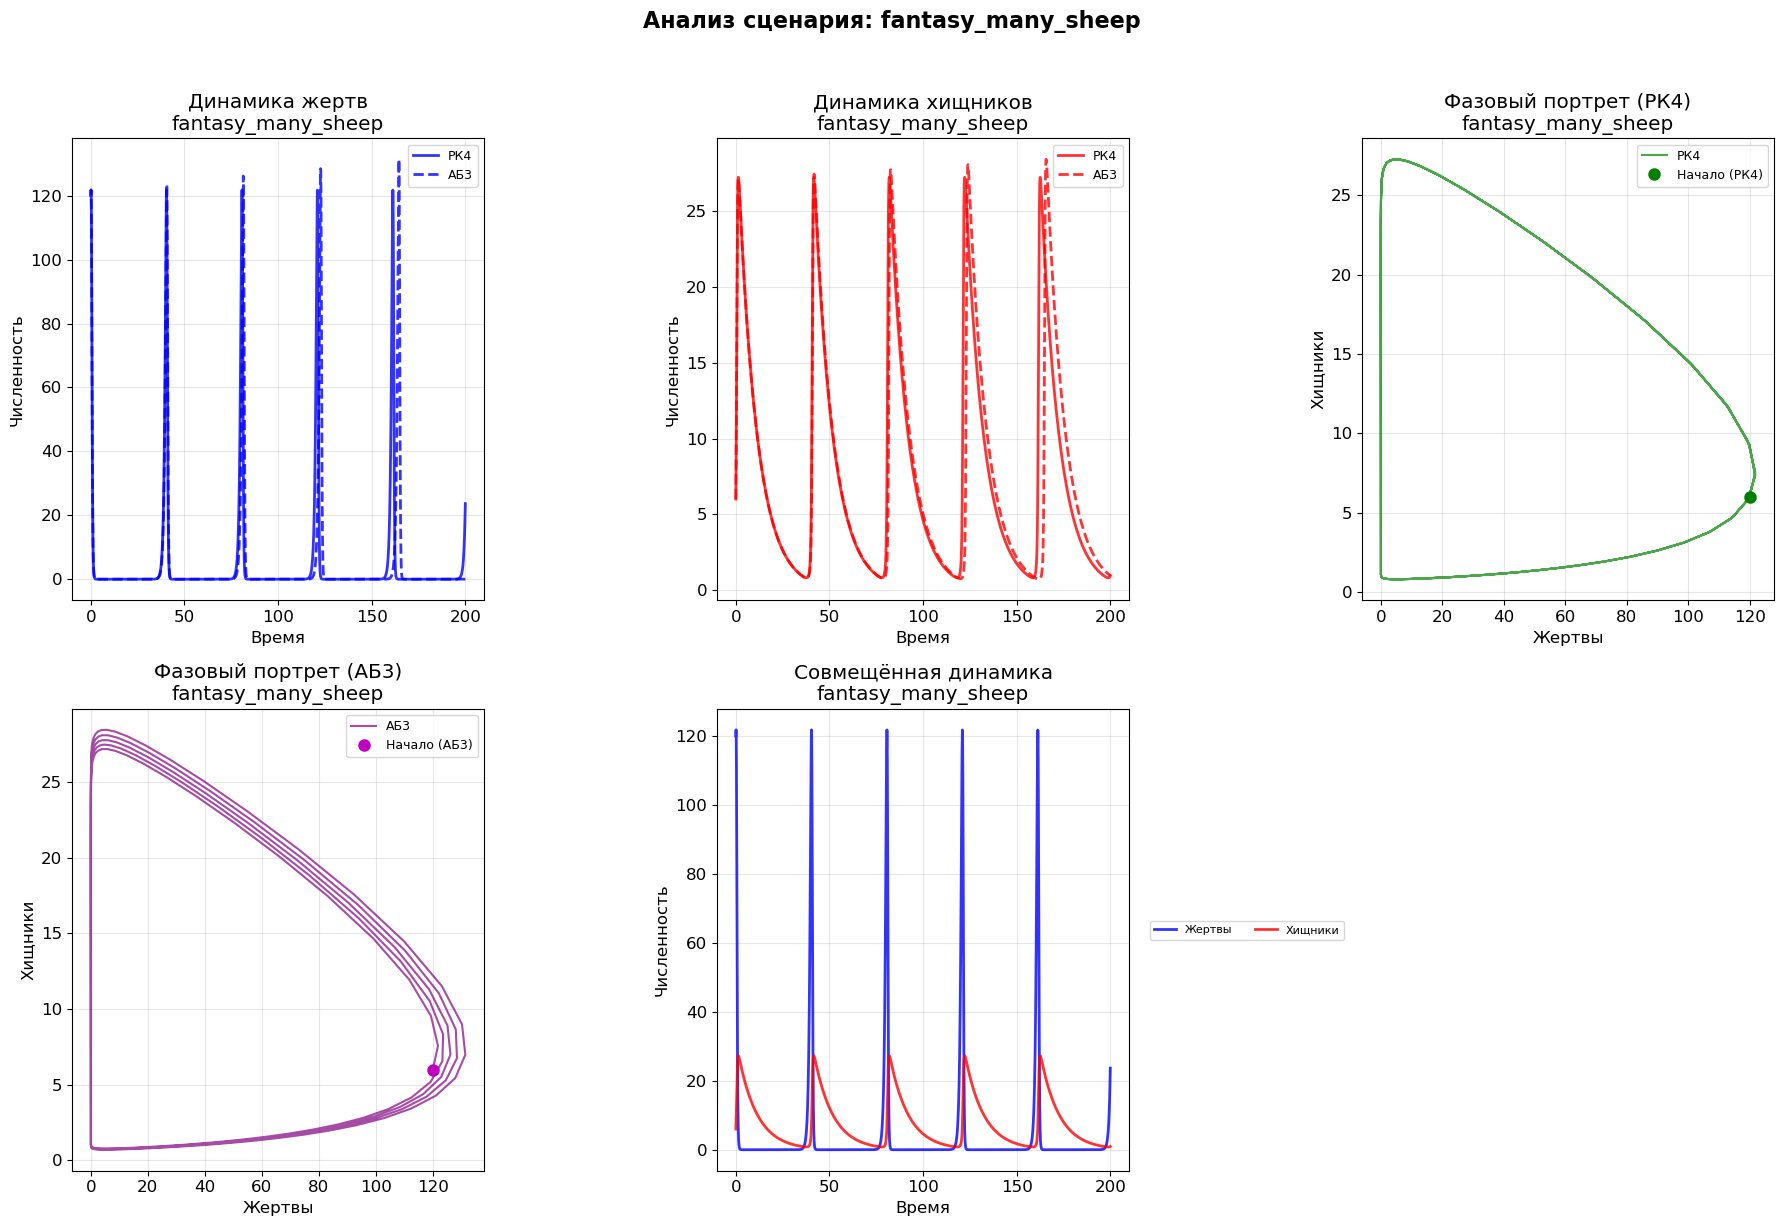

In [5]:
# 1.1 Сценарий: много овец
plot_scenario_comparison('fantasy_many_sheep')

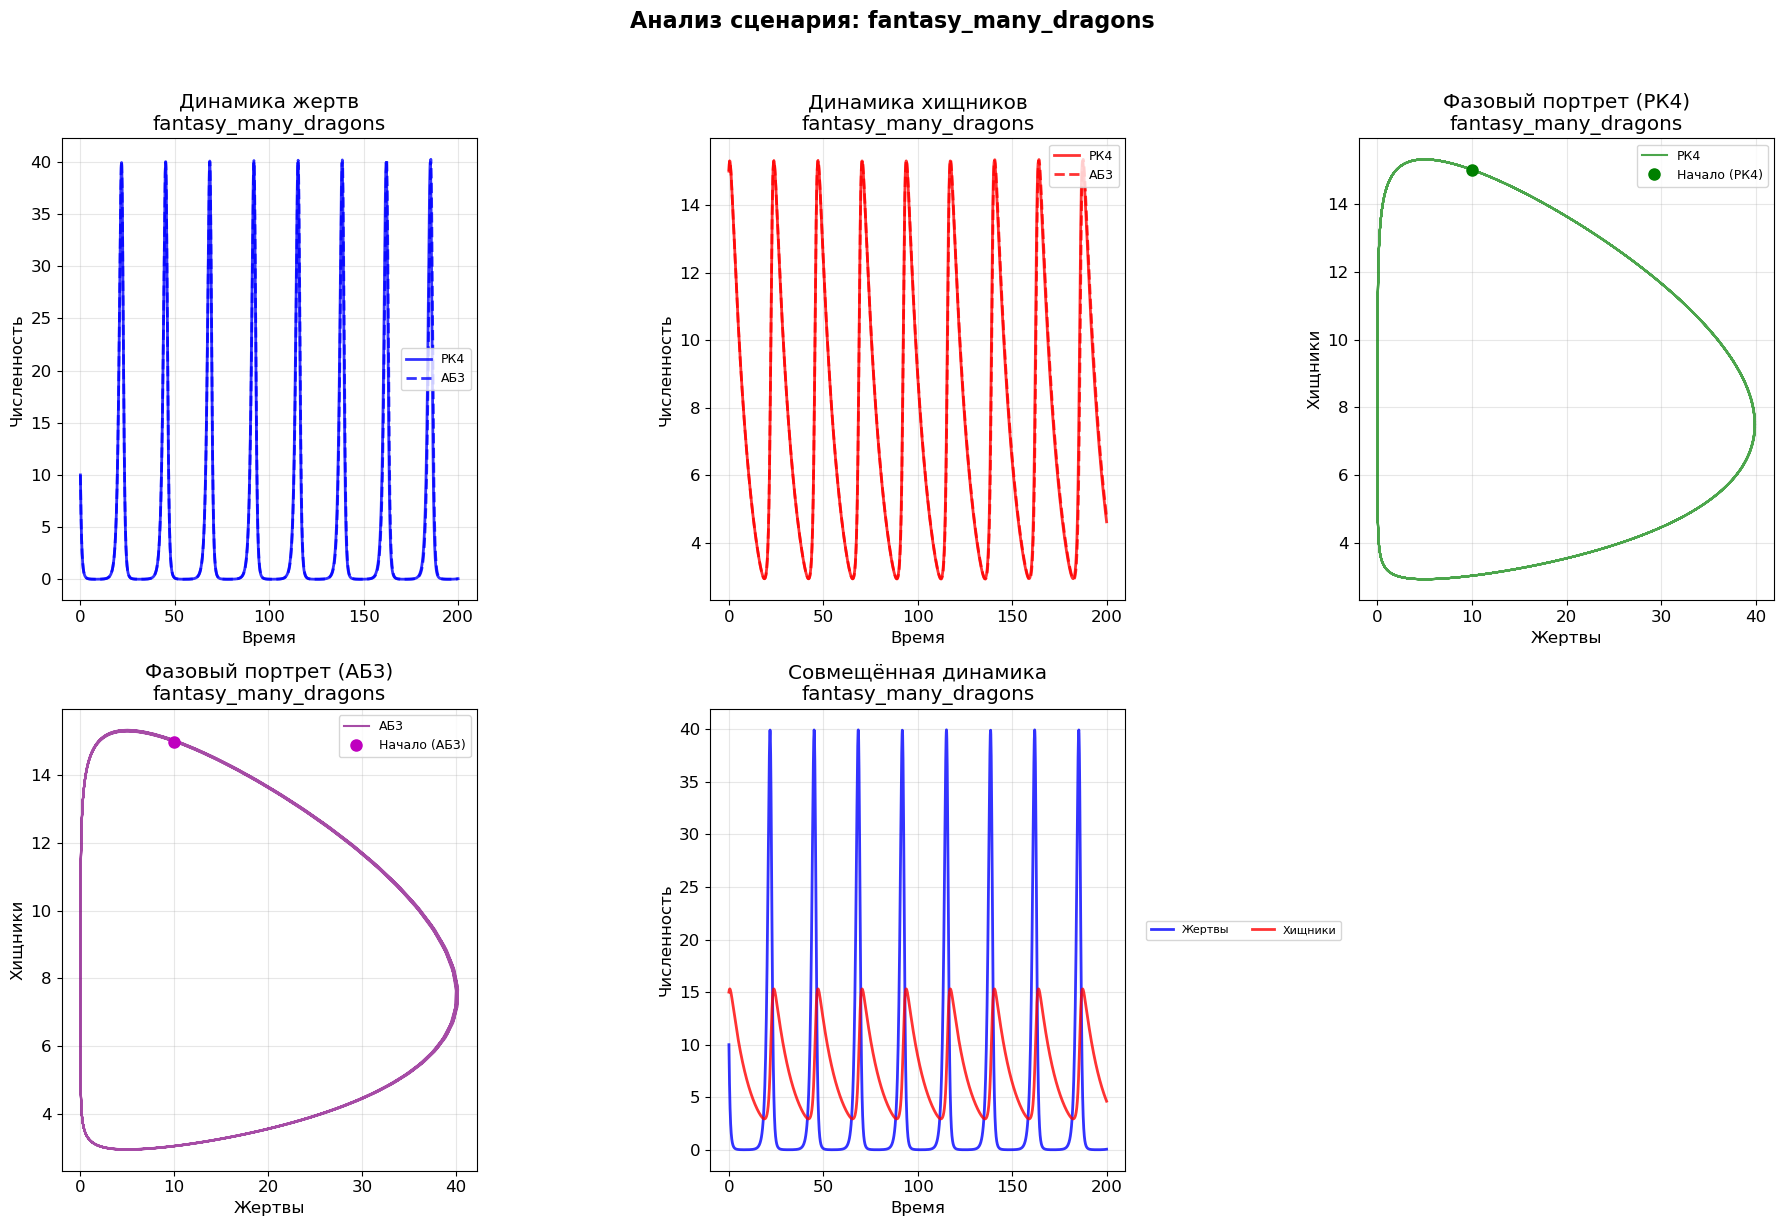

In [6]:
# 1.2 Сценарий: много драконов
plot_scenario_comparison('fantasy_many_dragons')

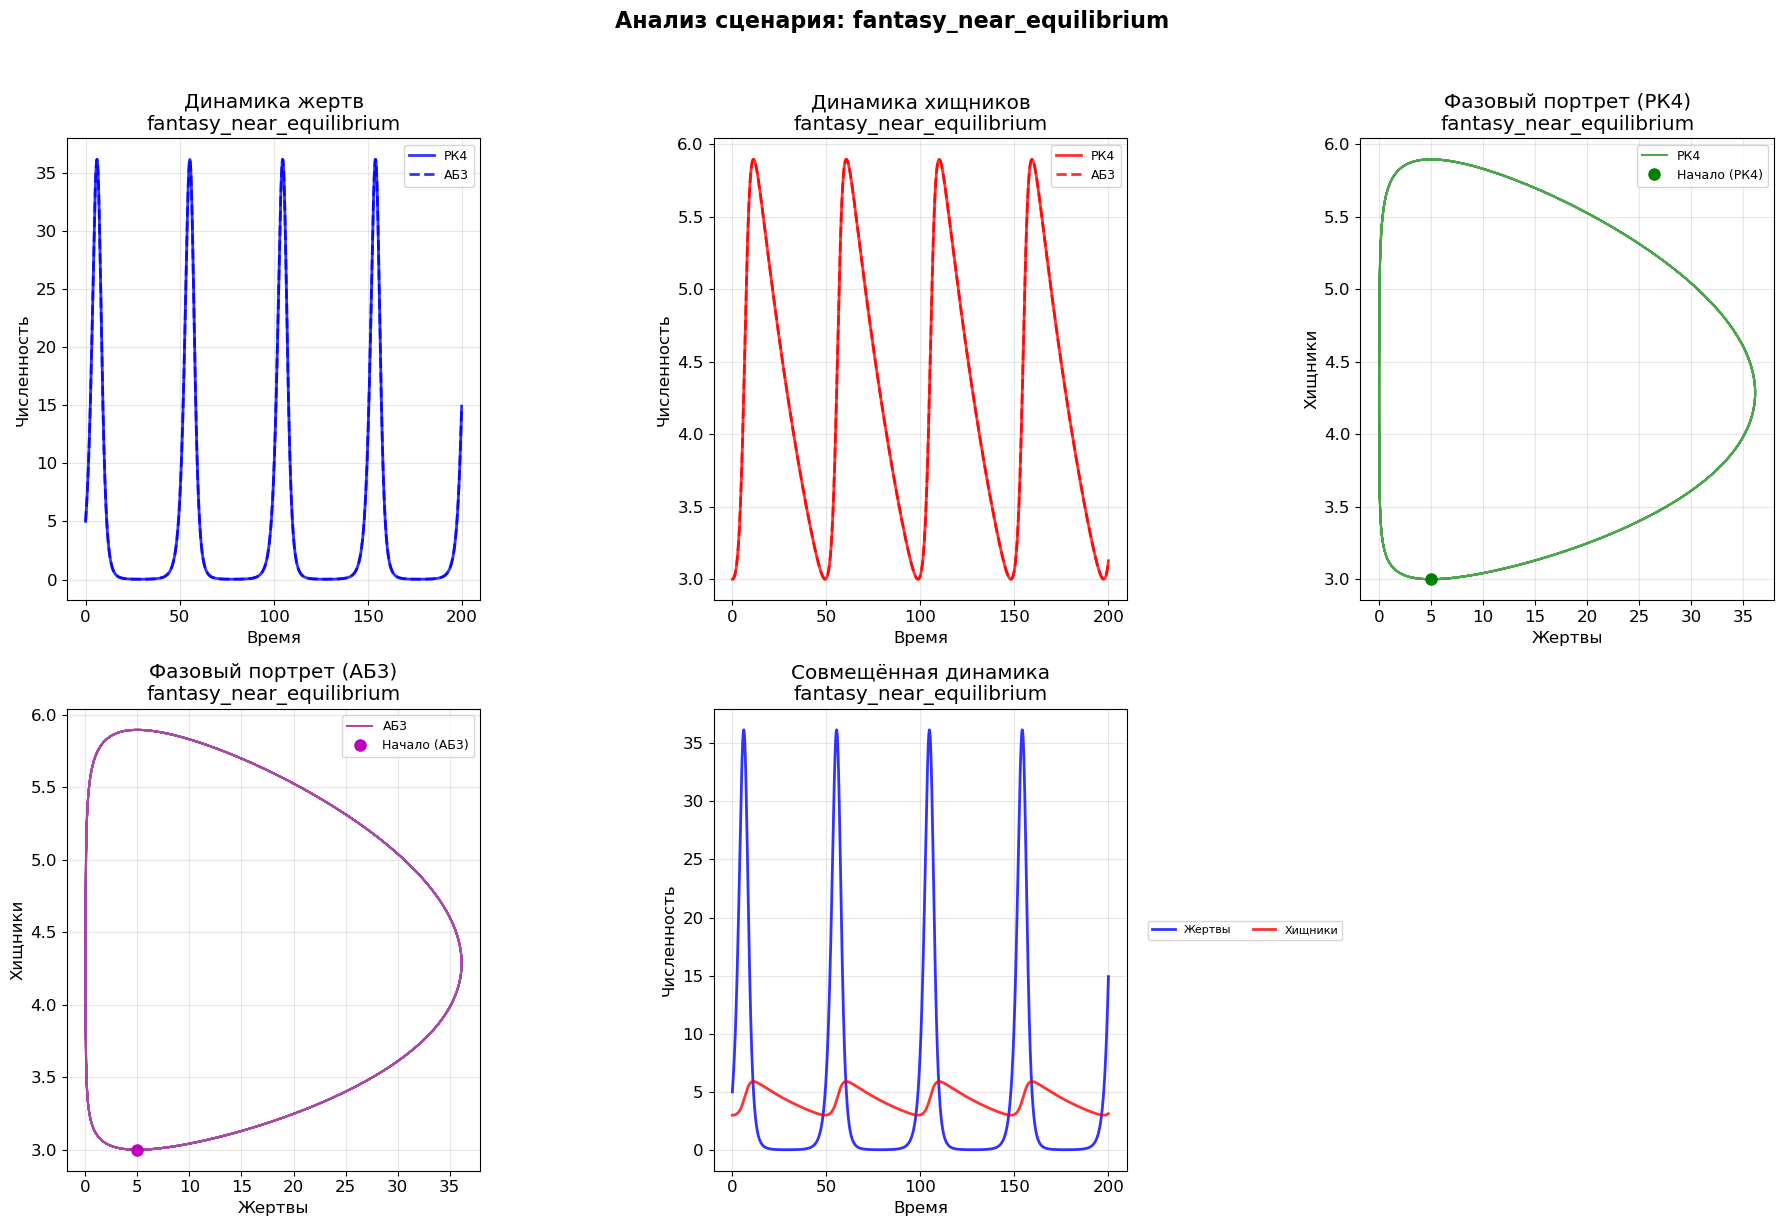

In [7]:
# 1.3 Сценарий: около равновесия
plot_scenario_comparison('fantasy_near_equilibrium')

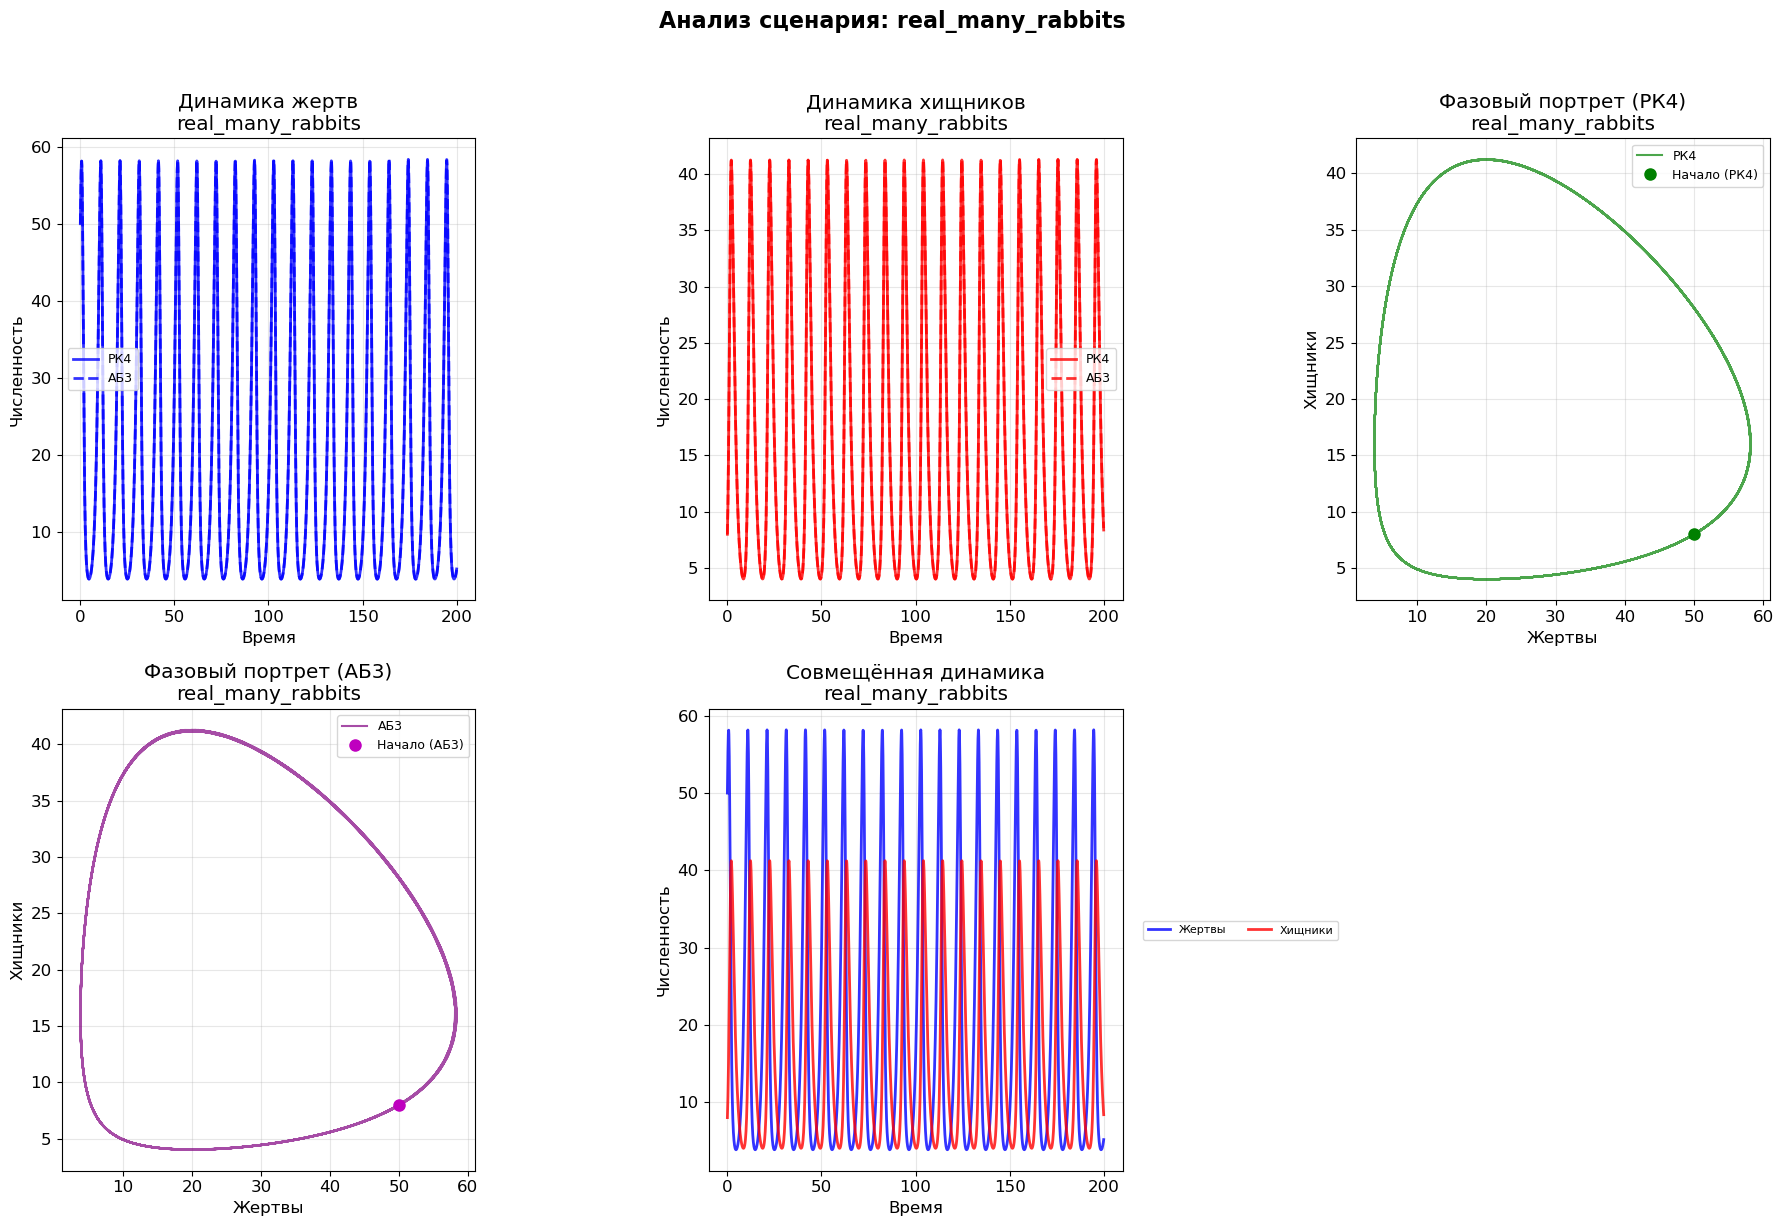

In [8]:
# 2.1 Сценарий: много кроликов
plot_scenario_comparison('real_many_rabbits')

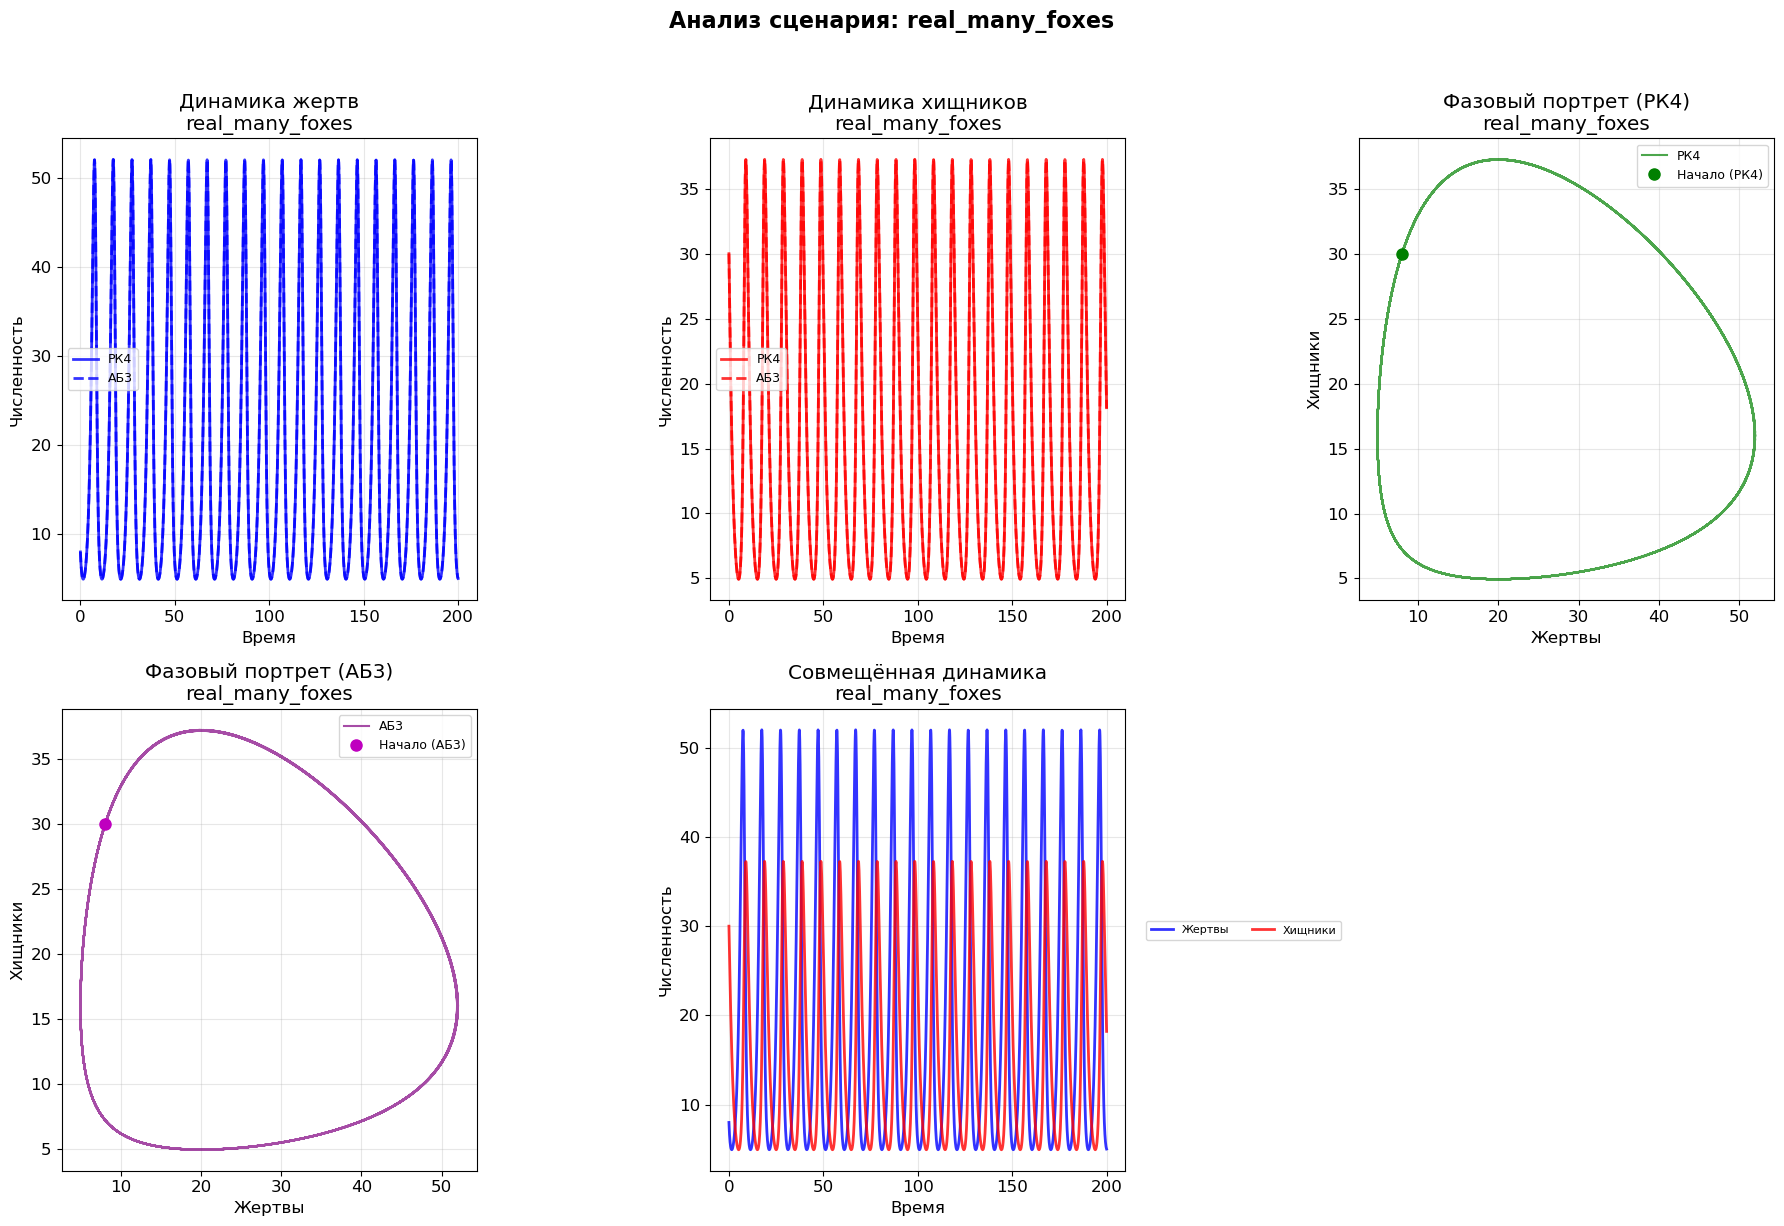

In [9]:
# 2.2 Сценарий: много лис
plot_scenario_comparison('real_many_foxes')

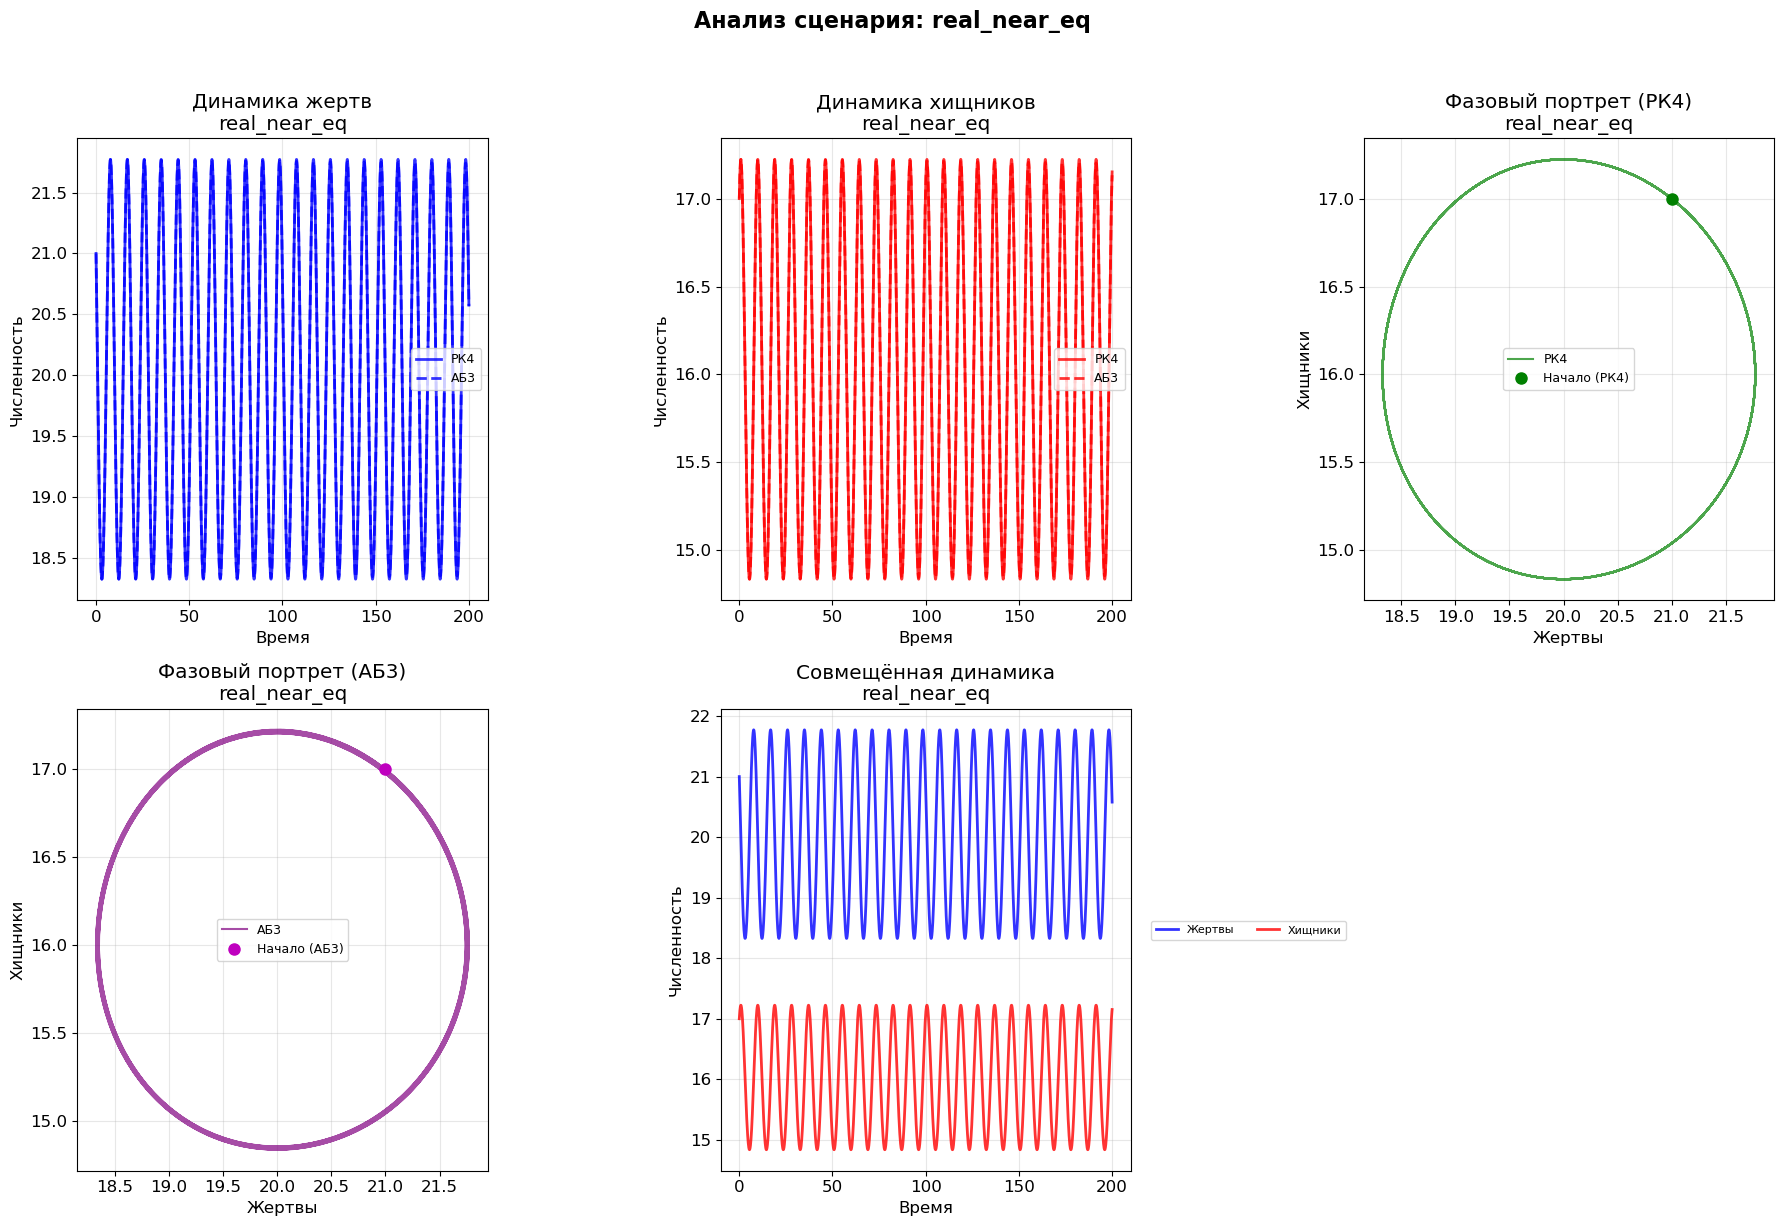

In [10]:
# 2.3 Сценарий: около равновесия
plot_scenario_comparison('real_near_eq')

## 